# Boosting  
adaboost: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [7]:
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
y_pred = clf.predict([[0, 0, 0, 0]])
print(y_pred)
print(clf.score(X, y))

[1]
0.983


In [15]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
np.random.seed(1)

digits = load_digits()

train_size = 1500
train_x, train_y = digits.data[:train_size], digits.target[:train_size]
test_x, test_y = digits.data[train_size:], digits.target[train_size:]



ensemble_size = 2000


ensemble = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                              algorithm="SAMME",
                              n_estimators=ensemble_size)


%time  ensemble.fit(train_x, train_y)


ensemble_predictions = ensemble.predict(test_x)

ensemble_acc = metrics.accuracy_score(test_y, ensemble_predictions)


print('Boosting: {}'.format(ensemble_acc))

CPU times: total: 4.84 s
Wall time: 4.85 s
Boosting: 0.8451178451178452


In [16]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np

diabetes = load_diabetes()

train_size = 400
train_x, train_y = diabetes.data[:train_size], diabetes.target[:train_size]
test_x, test_y = diabetes.data[train_size:], diabetes.target[train_size:]

np.random.seed(1)


ensemble_size = 2000
ensemble = AdaBoostRegressor(n_estimators=ensemble_size)


ensemble.fit(train_x, train_y)
predictions = ensemble.predict(test_x)

r2 = metrics.r2_score(test_y, predictions)
mse = metrics.mean_squared_error(test_y, predictions)

print('AdaBoosting:')
print('R-squared: {}'.format(r2))
print('MSE: {}'.format(mse))

AdaBoosting:
R-squared: 0.5682108119473204
MSE: 2390.471351852935


decision tree regression: https://www.google.com/url?sa=i&url=https%3A%2F%2Fheartbeat.fritz.ai%2Fimplementing-regression-using-a-decision-tree-and-scikit-learn-ac98552b43d7&psig=AOvVaw2YEVt2tLqQ9AN5SkPge1aC&ust=1593502823033000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCMj13-HCpuoCFQAAAAAdAAAAABAD  
decision tree regressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

(100, 1)
(100,)


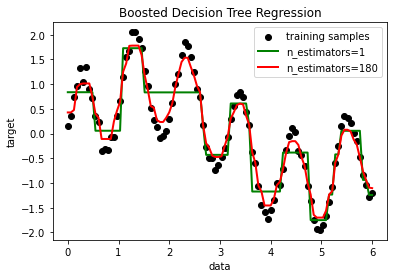

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor

# create dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
print(X.shape)

# np.newaxis 
# None
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])
print(y.shape)

# train regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=180, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# plot
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=180", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()